<a href="https://colab.research.google.com/github/Claudiano-Flores/-Analisando-dados-das-eleicoes-2022-com-Python/blob/main/Analisando_dados_das_elei%C3%A7%C3%B5es_2022_com_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Instalação do pacote de descriptografia. ⬇**


In [ ]:
!pip install asn1crypto==1.5.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Importação do arquivo baixado do TSE ⬇**


In [ ]:
!python rdv.py.txt -r o00407-7107204080310.rdv.txt > rdv.txt

2022-12-19 20:57:54,133 - INFO - Converte RDV o00407-7107204080310.rdv.txt


In [ ]:
content = []

with open(file="rdv.txt", mode="r") as fp:
  for line in fp.readlines():
    if "Governador" in line:
      break
    else:
      content.append(line)

**Filtro com a quantidade de linhas ⬇**

In [ ]:
len(content)

298

**Impressão das dez primeiras linhas ⬇**

In [ ]:
for line in content[0:10]:
  print(line)


----------------------------------------

Presidente

  1 - nominal  - [13]

  2 - nominal  - [13]

  3 - nominal  - [13]

  4 - nominal  - [13]

  5 - nominal  - [13]

  6 - nominal  - [13]

  7 - nominal  - [13]



**Extração apenas dados de votação** ⬇

In [ ]:
import re

In [ ]:
pattern = re.compile(pattern="\[(.*?)\]")

In [ ]:
votes = [ ]
for line in content:

  if "branco" in line:

    votes.append({"voto" : "branco", "quantidade": 1})  

  if "nulo" in line:

    votes.append({"voto" : "nulo" , "quantidade": 1})

  if "nominal" in line:

    vote = re.findall(pattern=pattern, string=line)[0]
    votes.append({"voto": f"{vote}", "quantidade": 1})


In [ ]:
len(votes)

294

**Impressão dos dez primeiros votos** ⬇

In [ ]:
for vote in votes[0:10]:
  print(vote)


{'voto': '13', 'quantidade': 1}
{'voto': '13', 'quantidade': 1}
{'voto': '13', 'quantidade': 1}
{'voto': '13', 'quantidade': 1}
{'voto': '13', 'quantidade': 1}
{'voto': '13', 'quantidade': 1}
{'voto': '13', 'quantidade': 1}
{'voto': '13', 'quantidade': 1}
{'voto': '13', 'quantidade': 1}
{'voto': '13', 'quantidade': 1}


**Impotação do pacote Pandas ⬇**

In [ ]:
import pandas as pd

**Base do Pandas (DataFrame) ⬇**

In [ ]:
votes_table = pd.DataFrame(votes)

In [ ]:
votes_table

,voto,quantidade
0,13,1
1,13,1
2,13,1
3,13,1
4,13,1
...,...,...
289,nulo,1
290,nulo,1
291,nulo,1
292,nulo,1


In [ ]:
votes_table.shape

(294, 2)

In [ ]:
votes_table.to_csv("rdv.csv", header=True, index=False)

**Agregação dos votos ⬇**

Agregração dos votos por soma 

In [ ]:
votes_table_agg = votes_table.groupby('voto').agg('sum').reset_index()

In [ ]:
votes_table_agg

,voto,quantidade
0,13,195
1,22,89
2,branco,4
3,nulo,6


Agregação dos votos em forma decrescente (da maior quantidade para a menor)


In [ ]:
votes_table_agg = votes_table_agg.sort_values(by='quantidade', ascending=False)

In [ ]:
votes_table_agg


,voto,quantidade
0,13,195
1,22,89
3,nulo,6
2,branco,4


Adição de coluna com valores relativos percentuais 

In [ ]:
votes_table_agg['quantidade_pct'] = round (100 * (votes_table_agg ['quantidade'] / votes_table_agg['quantidade'].sum()),2)

In [ ]:
votes_table_agg

,voto,quantidade,quantidade_pct
0,13,195,66.33
1,22,89,30.27
3,nulo,6,2.04
2,branco,4,1.36


**Seaborn** ⬇

In [ ]:
import seaborn as sns

In [ ]:
URNA = "São Paulo/SP - 408 - 310"

**Votos absolutos** ⬇

In [ ]:
x_column = 'voto'
y_column = 'quantidade'

In [ ]:
title = f'Apuração Presidente - Segundo turno de 2022 - Urna {URNA}'
x_lable = 'Voto'
y_lable = 'Quantidade'

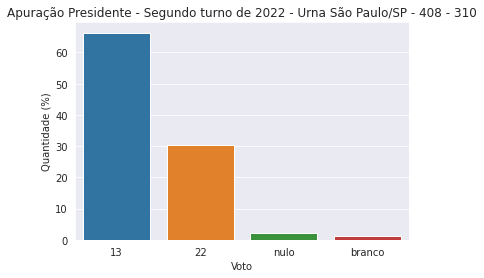

In [ ]:
with sns.axes_style('darkgrid'):
  chart = sns.barplot(data=votes_table_agg, x=x_column, y=y_column)
  chart.set(title=title, xlabel=x_lable, ylabel=y_lable)

**Votos relativos** ⬇

In [ ]:
x_column = 'voto'
y_column = 'quantidade_pct'

In [ ]:
title = f'Apuração Presidente - Segundo turno de 2022 - Urna {URNA}'
x_lable = 'Voto'
y_lable = 'Quantidade (%)'

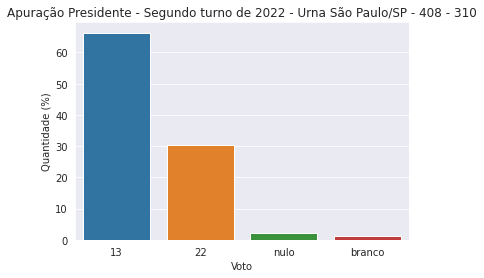

In [ ]:
with sns.axes_style('darkgrid'):
  chart = sns.barplot(data=votes_table_agg, x=x_column, y=y_column)
  chart.set(title=title, xlabel=x_lable, ylabel=y_lable);